In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
print(plt.rcParams)

_internal.classic_mode: False
agg.path.chunksize: 0
animation.bitrate: -1
animation.codec: h264
animation.convert_args: []
animation.convert_path: convert
animation.embed_limit: 20.0
animation.ffmpeg_args: []
animation.ffmpeg_path: ffmpeg
animation.frame_format: png
animation.html: none
animation.writer: ffmpeg
axes.autolimit_mode: data
axes.axisbelow: line
axes.edgecolor: black
axes.facecolor: white
axes.formatter.limits: [-5, 6]
axes.formatter.min_exponent: 0
axes.formatter.offset_threshold: 4
axes.formatter.use_locale: False
axes.formatter.use_mathtext: False
axes.formatter.useoffset: True
axes.grid: False
axes.grid.axis: both
axes.grid.which: major
axes.labelcolor: black
axes.labelpad: 4.0
axes.labelsize: medium
axes.labelweight: normal
axes.linewidth: 0.8
axes.prop_cycle: cycler('color', ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf'])
axes.spines.bottom: True
axes.spines.left: True
axes.spines.right: True
axes.spines.

In [3]:
import matplotlib.font_manager as fm

[(f.name, f.fname) for f in fm.fontManager.ttflist if 'Nanum' in f.name]
plt.rcParams['font.family'] = 'Malgun Gothic'

In [4]:
df = pd.read_csv('../bigdata/LPOINT_BIG_COMP/LPOINT_BIG_COMP_01_DEMO.csv')
df.head(5)
df.shape

(29913, 4)

In [5]:
df

,cust,ma_fem_dv,ages,zon_hlv
0,M000034966,여성,40대,Z07
1,M000059535,여성,30대,Z12
2,M000136117,여성,30대,Z11
3,M000201112,여성,50대,Z17
4,M000225114,여성,40대,Z17
...,...,...,...,...
29908,M999708287,여성,40대,Z10
29909,M999770689,여성,30대,Z16
29910,M999849895,여성,20대,Z04
29911,M999926092,남성,30대,Z08


In [6]:
df['zon_hlv'].unique()

array(['Z07', 'Z12', 'Z11', 'Z17', 'Z10', 'Z05', 'Z16', 'Z03', 'Z06',
       'Z14', 'Z01', 'Z04', 'Z09', 'Z15', 'Z08', 'Z13', 'Z02'],
      dtype=object)

In [7]:
df['zon_hlv'].nunique()

17

<AxesSubplot:xlabel='zon_hlv', ylabel='count'>

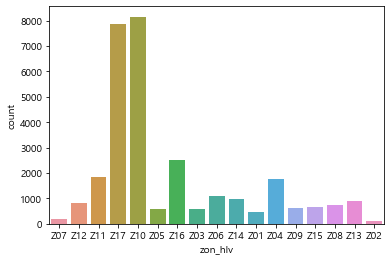

In [8]:
sns.countplot(x='zon_hlv', data=df)

### 연령별 구매 비율

<AxesSubplot:xlabel='ages', ylabel='count'>

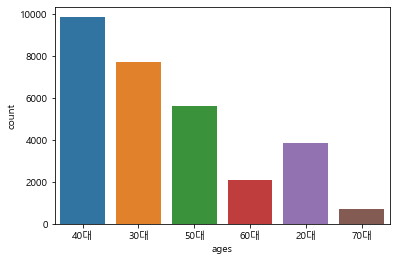

In [9]:
sns.countplot(x='ages', data=df)

<AxesSubplot:xlabel='ma_fem_dv', ylabel='count'>

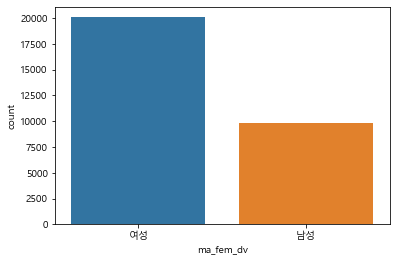

In [10]:
sns.countplot(x='ma_fem_dv', data=df)

In [11]:
df_2 = pd.read_csv('../bigdata/LPOINT_BIG_COMP/LPOINT_BIG_COMP_02_PDDE.csv')
df_2

,cust,rct_no,chnl_dv,cop_c,br_c,pd_c,de_dt,de_hr,buy_am,buy_ct
0,M430112881,A01000001113,1,A01,A010039,PD0290,20210101,10,15000.0,1
1,M646853852,A01000002265,1,A01,A010025,PD1369,20210101,10,79700.0,1
2,M430112881,A01000003148,1,A01,A010039,PD0290,20210101,10,19000.0,1
3,M430112881,A01000003148,1,A01,A010039,PD0290,20210101,10,19000.0,1
4,M430112881,A01000004946,1,A01,A010039,PD0290,20210101,10,19000.0,1
...,...,...,...,...,...,...,...,...,...,...
4381738,M533286446,E06052119978,2,A06,NaN,PD0507,20211231,23,50000.0,1
4381739,M533286446,E06052119978,2,A06,NaN,PD0507,20211231,23,50000.0,1
4381740,M533286446,E06052119978,2,A06,NaN,PD0507,20211231,23,50000.0,1
4381741,M533286446,E06052119978,2,A06,NaN,PD0507,20211231,23,50000.0,1


In [12]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4381743 entries, 0 to 4381742
Data columns (total 10 columns):
 #   Column   Dtype  
---  ------   -----  
 0   cust     object 
 1   rct_no   object 
 2   chnl_dv  int64  
 3   cop_c    object 
 4   br_c     object 
 5   pd_c     object 
 6   de_dt    int64  
 7   de_hr    int64  
 8   buy_am   float64
 9   buy_ct   int64  
dtypes: float64(1), int64(4), object(5)
memory usage: 334.3+ MB


In [97]:
res = df_2[['cust']].groupby('cust', as_index=False).size()
res = res['size'].value_counts()
res

1       1033
2        610
3        443
4        379
5        286
        ... 
1125       1
1034       1
1132       1
1307       1
1288       1
Name: size, Length: 1137, dtype: int64

### 오프/온라인 이용률

In [14]:
df_2['chnl_dv'].value_counts()

1    3953242
2     428501
Name: chnl_dv, dtype: int64

<AxesSubplot:xlabel='chnl_dv', ylabel='count'>

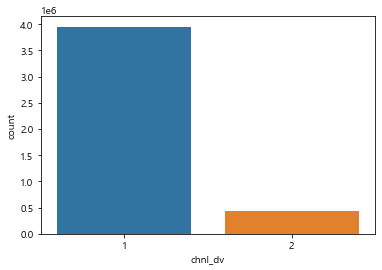

In [15]:
sns.countplot(x='chnl_dv', data=df_2)

### 주문 시간

<AxesSubplot:xlabel='de_hr', ylabel='count'>

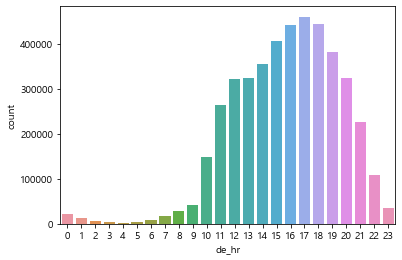

In [16]:
sns.countplot(x='de_hr', data=df_2)

### 1, 2 df merge

In [17]:
df_merge_outer = pd.merge(df,df_2, how='outer', on='cust')
df_merge_outer

,cust,ma_fem_dv,ages,zon_hlv,rct_no,chnl_dv,cop_c,br_c,pd_c,de_dt,de_hr,buy_am,buy_ct
0,M000034966,여성,40대,Z07,A01016688590,1.0,A01,A010045,PD0777,20210116.0,18.0,59000.0,1.0
1,M000034966,여성,40대,Z07,A01016688590,1.0,A01,A010045,PD0777,20210116.0,18.0,19000.0,1.0
2,M000034966,여성,40대,Z07,A01016688590,1.0,A01,A010045,PD0796,20210116.0,18.0,100.0,1.0
3,M000034966,여성,40대,Z07,A01016718167,1.0,A01,A010045,PD0816,20210116.0,18.0,62100.0,1.0
4,M000034966,여성,40대,Z07,A02357398521,1.0,A02,A020116,PD0630,20210325.0,13.0,19900.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4384734,M999962961,여성,50대,Z17,A05001012161,1.0,A05,A050039,PD0541,20210313.0,20.0,599000.0,1.0
4384735,M999962961,여성,50대,Z17,E06002810292,2.0,A06,NaN,PD0959,20210113.0,18.0,129000.0,1.0
4384736,M999962961,여성,50대,Z17,E06004609359,2.0,A06,NaN,PD0954,20210122.0,14.0,34300.0,1.0
4384737,M999962961,여성,50대,Z17,E06025413888,2.0,A06,NaN,PD0967,20210406.0,17.0,89000.0,1.0


In [18]:
ans = df_merge_outer.groupby(['ma_fem_dv', 'buy_ct'], as_index=False).size()
ans

,ma_fem_dv,buy_ct,size
0,남성,1.0,1071366
1,남성,2.0,132769
2,남성,3.0,31342
3,남성,4.0,13266
4,남성,5.0,6227
...,...,...,...
148,여성,89.0,1
149,여성,90.0,5
150,여성,96.0,2
151,여성,99.0,31


### 남성 / 여성 구매율 평균

In [19]:
ans = ans[['ma_fem_dv', 'size']].groupby('ma_fem_dv', as_index=False).mean()
ans

,ma_fem_dv,size
0,남성,16469.012987
1,여성,40968.802632


<AxesSubplot:xlabel='ma_fem_dv', ylabel='size'>

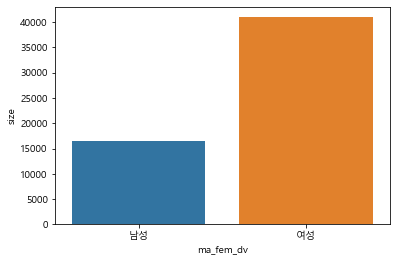

In [20]:
sns.barplot(x="ma_fem_dv", y="size", data=ans)

In [21]:
df_3 = pd.read_csv('../bigdata/LPOINT_BIG_COMP/LPOINT_BIG_COMP_04_PD_CLAC.csv')
df_3

,pd_c,pd_nm,clac_hlv_nm,clac_mcls_nm
0,PD0001,소파,가구,거실가구
1,PD0002,스툴/리빙의자,가구,거실가구
2,PD0003,탁자,가구,거실가구
3,PD0004,장식장/진열장,가구,거실가구
4,PD0005,기타가구,가구,기타가구
...,...,...,...,...
1928,PD1929,여성향수,화장품/뷰티케어,향수
1929,PD1930,남성향수,화장품/뷰티케어,향수
1930,PD1931,남녀공용향수,화장품/뷰티케어,향수
1931,PD1932,남성향수세트,화장품/뷰티케어,향수


In [22]:
df_3['clac_hlv_nm'].unique()

array(['가구', '건강식품', '건강용품', '건해산물', '계절가전', '공구/안전용품', '과일', '과자',
       '구기/필드스포츠', '금융/보험서비스', '기타(비상품)', '기타상품', '남성의류', '냉동식품',
       '냉장/세탁가전', '냉장식품', '담배', '대용식', '모바일', '문구/사무용품', '병통조림', '상품권',
       '생활/렌탈서비스', '생활/주방가전', '서적/음반/악기', '세제/위생', '속옷/양말/홈웨어', '수산물',
       '스포츠패션', '시즌스포츠', '식기/조리기구', '아웃도어/레저', '양곡', '여성의류', '여행/레저서비스',
       '영상/음향가전', '완구', '원예/애완', '유아동의류', '유아식품', '유제품', '음료', '인테리어/조명',
       '자동차용품', '조리식품', '조미료', '주류', '주방잡화', '채소', '청소/세탁/욕실용품', '축산물',
       '출산/육아용품', '침구/수예', '커피/차', '컴퓨터', '테넌트/음식점', '패션잡화', '퍼스널케어',
       '헬스/피트니스', '화장품/뷰티케어'], dtype=object)

In [34]:
df_3[['clac_hlv_nm', ]].

패션잡화          130
축산물            91
수산물            88
스포츠패션          82
문구/사무용품        72
채소             72
유아동의류          67
과일             58
속옷/양말/홈웨어      56
조미료            51
화장품/뷰티케어       50
생활/주방가전        43
퍼스널케어          39
원예/애완          39
구기/필드스포츠       38
조리식품           38
식기/조리기구        36
과자             36
침구/수예          35
자동차용품          35
아웃도어/레저        34
건강식품           32
출산/육아용품        32
냉장식품           32
주방잡화           32
가구             31
완구             31
건해산물           30
청소/세탁/욕실용품     30
여성의류           29
대용식            29
세제/위생          28
영상/음향가전        27
남성의류           26
건강용품           25
음료             24
테넌트/음식점        22
주류             22
시즌스포츠          22
인테리어/조명        21
커피/차           20
냉동식품           20
헬스/피트니스        15
양곡             15
서적/음반/악기       15
공구/안전용품        15
계절가전           15
컴퓨터            14
병통조림           14
생활/렌탈서비스       13
냉장/세탁가전        12
상품권            10
유제품             9
기타(비상품)         7
담배              6
여행/레저서비스  

In [24]:
식료품 = 건강식품, 건해산물, 과일, 과자, 냉동식품, 냉장식품, 대용식, 병/통조림, 수산물, 양곡, 유제품, 음료, 조리식품, 유아식품, 조미료, 주류, 채소, 축산물, 커피/차, 담배 - 20
가전제품 = 계절가전, 냉장/세탁가전, 생활/주방가전, 영상/음향가전, 컴퓨터, 모바일 - 5
생활용품 = 건강용품, 공구/안전용품, 문구/사무용품, 세제/위생, 식기/조리기구, 원예/애완, 완구, 주방잡화, 청소/세탁/욕실용품, 출산/육아용품, 침구/수예, 퍼스널케어, 화장품/뷰티케어 - 13
의류 = 남성의류, 여성의류, 유아동의류, 패션잡화, 속옷/양말/홈웨어 - 6 
레저/자동차 = 구기/필드스포츠, 스포츠패션, 시즌스포츠, 아웃도어/레저, 자동차용품, 헬스/피트니스 - 6
서비스 = 금융/보험서비스, 생활/렌탈서비스, 여행/레저서비스 - 3
가구, 기타(비상품), 기타상품, 상품권, 인테리어/조명, 서적/음반/악기, 테넌트/음식점 - 7

SyntaxError: cannot assign to operator (3483132703.py, line 5)

In [25]:
df_merge_2 = pd.merge(df_merge_outer, df_3, how='outer', on='pd_c')
df_merge_2

,cust,ma_fem_dv,ages,zon_hlv,rct_no,chnl_dv,cop_c,br_c,pd_c,de_dt,de_hr,buy_am,buy_ct,pd_nm,clac_hlv_nm,clac_mcls_nm
0,M000034966,여성,40대,Z07,A01016688590,1.0,A01,A010045,PD0777,20210116.0,18.0,59000.0,1.0,남성런닝/트레이닝화,스포츠패션,남성스포츠화
1,M000034966,여성,40대,Z07,A01016688590,1.0,A01,A010045,PD0777,20210116.0,18.0,19000.0,1.0,남성런닝/트레이닝화,스포츠패션,남성스포츠화
2,M000136117,여성,30대,Z11,A01294575336,1.0,A01,A010018,PD0777,20210805.0,15.0,239000.0,1.0,남성런닝/트레이닝화,스포츠패션,남성스포츠화
3,M000261625,여성,40대,Z17,A01117216600,1.0,A01,A010017,PD0777,20210403.0,13.0,179000.0,1.0,남성런닝/트레이닝화,스포츠패션,남성스포츠화
4,M000419293,여성,40대,Z17,A02041463489,1.0,A02,A020008,PD0777,20210129.0,14.0,3000.0,3.0,남성런닝/트레이닝화,스포츠패션,남성스포츠화
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4384734,M858719851,여성,60대,Z16,A05001516873,1.0,A05,A050072,PD0995,20210430.0,10.0,139000.0,1.0,보이스레코더,영상/음향가전,소형디지털가전
4384735,M880029153,남성,40대,Z16,E06043468594,2.0,A06,NaN,PD0917,20210712.0,21.0,199000.0,1.0,미니벨로,아웃도어/레저,자전거
4384736,M986268092,남성,40대,Z09,E06040602652,2.0,A06,NaN,PD0917,20210523.0,8.0,187050.0,1.0,미니벨로,아웃도어/레저,자전거
4384737,M926014276,남성,40대,Z10,A02105319111,1.0,A02,A020023,PD1059,20210828.0,17.0,800000.0,8.0,분양,원예/애완,동물병원


In [98]:
df_merge_2['br_c'].nunique()

6755

In [53]:
pd.set_option('display.width', 60)
df_merge_2['clac_hlv_nm'].value_counts().to_frame()

,clac_hlv_nm
과자,440223
채소,423178
대용식,311966
유제품,284420
냉장식품,266481
음료,250179
과일,231090
축산물,190062
주류,169834
테넌트/음식점,166240


In [46]:
pd.set_option('display.max_rows', 500)

### 여성 구매 품목

In [54]:
ans = df_merge_2[['ma_fem_dv', 'clac_hlv_nm']]
ans

,ma_fem_dv,clac_hlv_nm
0,여성,스포츠패션
1,여성,스포츠패션
2,여성,스포츠패션
3,여성,스포츠패션
4,여성,스포츠패션
...,...,...
4384734,여성,영상/음향가전
4384735,남성,아웃도어/레저
4384736,남성,아웃도어/레저
4384737,남성,원예/애완


In [55]:
ans_female = ans[ans['ma_fem_dv'] == '여성']
res = ans_female[['ma_fem_dv', 'clac_hlv_nm']].groupby(['ma_fem_dv', 'clac_hlv_nm']).size().unstack()
res.max().sort_values(ascending=False)

clac_hlv_nm
채소            317729
과자            310548
대용식           218272
유제품           202722
냉장식품          188646
과일            167968
음료            157388
축산물           140268
테넌트/음식점       122522
주류            107915
조미료           101941
냉동식품           87601
청소/세탁/욕실용품     74666
조리식품           70377
여성의류           61538
수산물            58484
문구/사무용품        56733
남성의류           49288
주방잡화           45250
스포츠패션          45228
세제/위생          44039
패션잡화           42175
퍼스널케어          40793
건해산물           38863
화장품/뷰티케어       35449
속옷/양말/홈웨어      30314
기타(비상품)        30285
커피/차           25826
완구             24525
병통조림           22428
유아동의류          20741
식기/조리기구        18129
양곡             16435
원예/애완          16270
담배             14588
건강식품           10776
유아식품           10679
공구/안전용품         8028
침구/수예           7614
아웃도어/레저         7415
출산/육아용품         7358
건강용품            7091
자동차용품           6302
상품권             6267
생활/렌탈서비스        4864
구기/필드스포츠        3950
헬스/피트니스         3855
생

### 남성 구매 품목

In [56]:
ans_female = ans[ans['ma_fem_dv'] == '남성']
res = ans_female[['ma_fem_dv', 'clac_hlv_nm']].groupby(['ma_fem_dv', 'clac_hlv_nm']).size().unstack()
res.max().sort_values(ascending=False)

clac_hlv_nm
과자            129675
채소            105449
대용식            93694
음료             92791
유제품            81698
냉장식품           77835
과일             63122
주류             61919
축산물            49794
테넌트/음식점        43718
냉동식품           38963
조미료            36075
조리식품           33853
청소/세탁/욕실용품     29527
담배             26051
수산물            21724
문구/사무용품        20182
남성의류           19288
세제/위생          16966
주방잡화           16065
스포츠패션          16022
기타(비상품)        15517
퍼스널케어          14211
패션잡화           13863
건해산물           13292
여성의류           13031
완구             11061
병통조림            9033
커피/차            8884
화장품/뷰티케어        8717
속옷/양말/홈웨어       8468
유아동의류           6548
상품권             6479
생활/렌탈서비스        5723
양곡              5691
식기/조리기구         5586
원예/애완           5162
건강식품            4230
유아식품            4111
공구/안전용품         4095
건강용품            3638
자동차용품           3361
아웃도어/레저         2981
출산/육아용품         2830
침구/수예           2196
컴퓨터             1937
생활/주방가전         1753
구

### 엘페이

In [57]:
df_4 = pd.read_csv('../bigdata/LPOINT_BIG_COMP/LPOINT_BIG_COMP_06_LPAY.csv')
df_4

,cust,rct_no,cop_c,chnl_dv,de_dt,de_hr,buy_am
0,M629656521,210803210311226,A03,1,20210803,21,10900
1,M216016456,210803130167542,L01,2,20210803,13,6860
2,M205142844,210803140275112,A02,1,20210803,14,9000
3,M737010483,210803040637594,A06,2,20210803,4,36740
4,M707775545,210803140675502,A06,2,20210803,14,138500
...,...,...,...,...,...,...,...
353179,M470112503,210125110644545,A06,2,20210125,11,51800
353180,M470112503,210104210652271,A06,2,20210104,21,6440
353181,M748878049,210119200278240,A02,1,20210119,20,17600
353182,M748878049,210119180267206,A02,1,20210119,18,12400


In [58]:
df_use_lpay = pd.merge(df, df_4, how='inner', on='cust')
df_use_lpay

,cust,ma_fem_dv,ages,zon_hlv,rct_no,cop_c,chnl_dv,de_dt,de_hr,buy_am
0,M000136117,여성,30대,Z11,210926220176038,D01,2,20210926,22,15100
1,M000136117,여성,30대,Z11,211120000687692,A06,2,20211120,0,177301
2,M000136117,여성,30대,Z11,210104110684235,A06,2,20210104,11,42600
3,M000136117,여성,30대,Z11,210109140124587,A01,1,20210109,14,902500
4,M000419293,여성,40대,Z17,211103140120216,D01,2,20211103,14,9900
...,...,...,...,...,...,...,...,...,...,...
353179,M999962961,여성,50대,Z17,210724200025828,L00,2,20210724,20,9156
353180,M999962961,여성,50대,Z17,210214170187495,A01,1,20210214,17,5500
353181,M999962961,여성,50대,Z17,210214180290789,C02,1,20210214,18,12700
353182,M999962961,여성,50대,Z17,210113180665862,A06,2,20210113,18,86380


### 엘페이 이용 고객

In [59]:
df = pd.read_csv('../bigdata/LPOINT_BIG_COMP/LPOINT_BIG_COMP_01_DEMO.csv')
df.head(5)

,cust,ma_fem_dv,ages,zon_hlv
0,M000034966,여성,40대,Z07
1,M000059535,여성,30대,Z12
2,M000136117,여성,30대,Z11
3,M000201112,여성,50대,Z17
4,M000225114,여성,40대,Z17


In [60]:
df_4 = pd.read_csv('../bigdata/LPOINT_BIG_COMP/LPOINT_BIG_COMP_06_LPAY.csv')
df_4

,cust,rct_no,cop_c,chnl_dv,de_dt,de_hr,buy_am
0,M629656521,210803210311226,A03,1,20210803,21,10900
1,M216016456,210803130167542,L01,2,20210803,13,6860
2,M205142844,210803140275112,A02,1,20210803,14,9000
3,M737010483,210803040637594,A06,2,20210803,4,36740
4,M707775545,210803140675502,A06,2,20210803,14,138500
...,...,...,...,...,...,...,...
353179,M470112503,210125110644545,A06,2,20210125,11,51800
353180,M470112503,210104210652271,A06,2,20210104,21,6440
353181,M748878049,210119200278240,A02,1,20210119,20,17600
353182,M748878049,210119180267206,A02,1,20210119,18,12400


In [61]:
use_counts = df_4[['cust', 'chnl_dv']].groupby('cust', as_index=False).size()
res = use_counts[use_counts['size'] > 30]
use_counts


,cust,size
0,M000136117,4
1,M000419293,42
2,M000494848,94
3,M000557840,38
4,M000871427,5
...,...,...
8901,M999227380,2
8902,M999268192,30
8903,M999599111,77
8904,M999770689,79


In [62]:
use_counts

,cust,size
0,M000136117,4
1,M000419293,42
2,M000494848,94
3,M000557840,38
4,M000871427,5
...,...,...
8901,M999227380,2
8902,M999268192,30
8903,M999599111,77
8904,M999770689,79


In [63]:
df_outer_lpay = pd.merge(df, use_counts, how='outer', on='cust')
df_outer_lpay

,cust,ma_fem_dv,ages,zon_hlv,size
0,M000034966,여성,40대,Z07,NaN
1,M000059535,여성,30대,Z12,NaN
2,M000136117,여성,30대,Z11,4.0
3,M000201112,여성,50대,Z17,NaN
4,M000225114,여성,40대,Z17,NaN
...,...,...,...,...,...
29908,M999708287,여성,40대,Z10,NaN
29909,M999770689,여성,30대,Z16,79.0
29910,M999849895,여성,20대,Z04,NaN
29911,M999926092,남성,30대,Z08,NaN


In [64]:
res = df_outer_lpay['size'].fillna(-999)
values = [0] * 2

for i in res:
    if i == -999:
        values[0] += 1
    else:
        values[1] += 1


In [65]:
values

[21007, 8906]

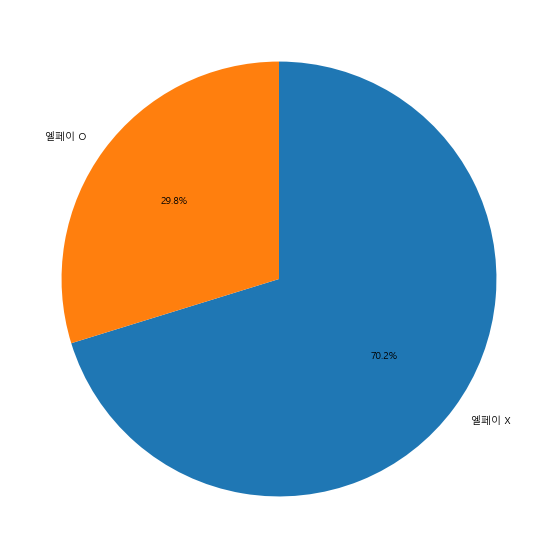

In [66]:
plt.figure(figsize=(10, 10))
plt.pie(values, labels=['엘페이 X', '엘페이 O'], autopct='%.1f%%', startangle=90, counterclock=False)
plt.show()

### 엘페이 이용 성별

In [67]:
df_inner_lpay = pd.merge(df, use_counts, how='inner', on='cust')
df_inner_lpay

,cust,ma_fem_dv,ages,zon_hlv,size
0,M000136117,여성,30대,Z11,4
1,M000419293,여성,40대,Z17,42
2,M000494848,여성,30대,Z10,94
3,M000557840,남성,30대,Z11,38
4,M000871427,여성,20대,Z10,5
...,...,...,...,...,...
8901,M999227380,여성,40대,Z17,2
8902,M999268192,여성,30대,Z10,30
8903,M999599111,여성,40대,Z04,77
8904,M999770689,여성,30대,Z16,79


<AxesSubplot:xlabel='ma_fem_dv', ylabel='count'>

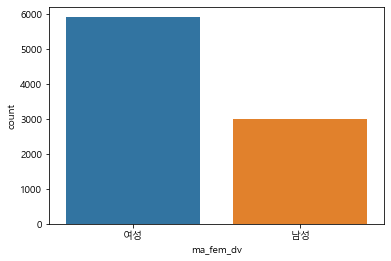

In [68]:
sns.countplot(x='ma_fem_dv', data=df_inner_lpay)

### 엘페이 이용 연령

<AxesSubplot:xlabel='ages', ylabel='count'>

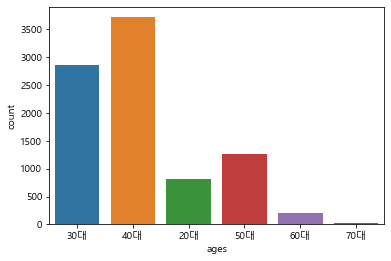

In [69]:
sns.countplot(x='ages', data=df_inner_lpay)

### 엘페이 이용하지 않는 연령

In [70]:
df_outer_lpay['size'].fillna(-999, inplace=True)
res = df_outer_lpay[df_outer_lpay['size'] == -999]
res

,cust,ma_fem_dv,ages,zon_hlv,size
0,M000034966,여성,40대,Z07,-999.0
1,M000059535,여성,30대,Z12,-999.0
3,M000201112,여성,50대,Z17,-999.0
4,M000225114,여성,40대,Z17,-999.0
5,M000261625,여성,40대,Z17,-999.0
...,...,...,...,...,...
29905,M999515910,남성,40대,Z05,-999.0
29907,M999673157,남성,30대,Z10,-999.0
29908,M999708287,여성,40대,Z10,-999.0
29910,M999849895,여성,20대,Z04,-999.0


<AxesSubplot:xlabel='ages', ylabel='count'>

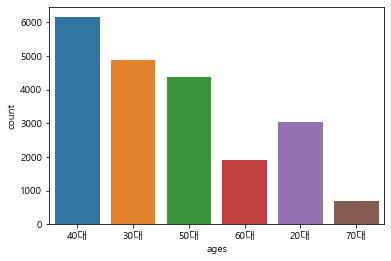

In [71]:
sns.countplot(x='ages', data=res)

In [72]:
df_merge_lpay = pd.merge(df_4, df, how='outer', on='cust')
df_merge_lpay

,cust,rct_no,cop_c,chnl_dv,de_dt,de_hr,buy_am,ma_fem_dv,ages,zon_hlv
0,M629656521,2.108032e+14,A03,1.0,20210803.0,21.0,10900.0,남성,40대,Z04
1,M216016456,2.108031e+14,L01,2.0,20210803.0,13.0,6860.0,여성,40대,Z04
2,M216016456,2.112231e+14,L01,2.0,20211223.0,11.0,12650.0,여성,40대,Z04
3,M216016456,2.112231e+14,L01,2.0,20211223.0,12.0,310.0,여성,40대,Z04
4,M216016456,2.104010e+14,L01,2.0,20210401.0,1.0,1500.0,여성,40대,Z04
...,...,...,...,...,...,...,...,...,...,...
374186,M999515910,NaN,NaN,NaN,NaN,NaN,NaN,남성,40대,Z05
374187,M999673157,NaN,NaN,NaN,NaN,NaN,NaN,남성,30대,Z10
374188,M999708287,NaN,NaN,NaN,NaN,NaN,NaN,여성,40대,Z10
374189,M999849895,NaN,NaN,NaN,NaN,NaN,NaN,여성,20대,Z04


In [73]:
df_merge_lpay.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 374191 entries, 0 to 374190
Data columns (total 10 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   cust       374191 non-null  object 
 1   rct_no     353184 non-null  float64
 2   cop_c      353184 non-null  object 
 3   chnl_dv    353184 non-null  float64
 4   de_dt      353184 non-null  float64
 5   de_hr      353184 non-null  float64
 6   buy_am     353184 non-null  float64
 7   ma_fem_dv  374191 non-null  object 
 8   ages       374191 non-null  object 
 9   zon_hlv    374191 non-null  object 
dtypes: float64(5), object(5)
memory usage: 31.4+ MB


In [74]:
grp = df_merge_lpay.groupby('cop_c')

In [75]:
df_merge_lpay['cop_c'].unique()

array(['A03', 'L01', 'L00', 'D01', 'A06', 'A02', 'A01', 'D02', 'A05',
       'A04', 'C01', 'C02', 'B01', 'E01', nan], dtype=object)

In [76]:
labels= ['A03', 'L01', 'L00', 'D01', 'A06', 'A02', 'A01', 'D02', 'A05', 'A04', 'C01', 'C02', 'B01', 'E01']

In [77]:
values = [0] * 7
for i in labels:
    i = str(i)
    if 'A' in i:
        res = grp.size()[i]
        values[0] += res
    elif 'B' in i:
        res = grp.size()[i]
        values[1] += res
    elif 'C' in i:
        res = grp.size()[i]
        values[2] += res
    elif 'D' in i:
        res = grp.size()[i]
        values[3] += res
    elif 'E' in i:
        res = grp.size()[i]
        values[4] += res
    elif 'L00' in i:
        res = grp.size()[i]
        values[5] += res
    else:
        res = grp.size()[i]
        values[6] += res
   

In [78]:
labels = ['A', 'B', 'C', 'D', 'E', 'L00', 'L01']

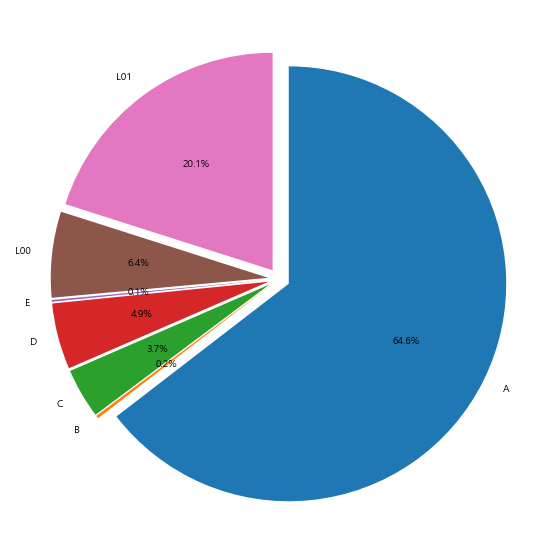

In [79]:
plt.figure(figsize=(10, 10))
explode = [0.05] * 7
plt.pie(values, labels=labels, autopct='%.1f%%', startangle=90, counterclock=False, explode=explode)
plt.show()

#### 세분화

In [80]:
labels= ['A03', 'L01', 'L00', 'D01', 'A06', 'A02', 'A01', 'D02', 'A05', 'A04', 'C01', 'C02', 'B01', 'E01']

In [81]:
values = []
for i in labels:
    i = str(i)
    res = grp.size()[i]
    values.append(res)

In [ ]:
explode = [0.05] * 14
plt.figure(figsize=(10, 10))
plt.pie(values, labels=labels, autopct='%.1f%%', startangle=90, counterclock=False, explode=explode)
plt.show()

- A01~06 : 유통사
- B01 : 숙박업종
- C01~02 : 엔터테인먼트
- D01~02 : F&B
- E01 : 렌탈업종
- L00 : 기타 제휴사
- L01 : 비 제휴사

### 제휴사

In [82]:
df_others = pd.read_csv('../bigdata/LPOINT_BIG_COMP/LPOINT_BIG_COMP_03_COP_U.csv')
df_others

,cust,rct_no,cop_c,br_c,chnl_dv,de_dt,vst_dt,de_hr,buy_am
0,M839993508,21102612B015763935,B01,B010012,1,20211026,20211026,12,60000
1,M839993508,21110610B014219744,B01,B010012,1,20211106,20211106,10,17100
2,M839993508,21021112B013419710,B01,B010012,1,20210211,20210211,12,136500
3,M839993508,21092010B012637545,B01,B010012,1,20210920,20210920,10,34200
4,M839993508,21101009D015920171,D01,D010614,1,20211010,20211010,9,2500
...,...,...,...,...,...,...,...,...,...
248299,M058650684,21111614C021426818,C02,C020002,1,20211116,20211116,14,2000
248300,M058650684,21111619C023223432,C02,C020002,1,20211116,20211116,19,26900
248301,M014154595,21121209C015324520,C01,C010087,2,20211212,20211212,9,2000
248302,M510878172,21112719C013369102,C01,C010007,2,20211127,20211127,19,6000


In [83]:
df_others['cust'].value_counts()

M223630342    261
M295053802    130
M724456397    123
M710368459    115
M678207187     98
             ... 
M198587919      1
M797225099      1
M696616962      1
M549951590      1
M761634870      1
Name: cust, Length: 21769, dtype: int64

<AxesSubplot:xlabel='de_hr', ylabel='count'>

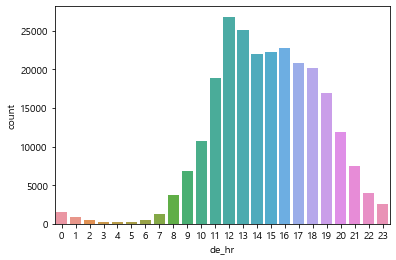

In [84]:
sns.countplot(x='de_hr', data=df_others)

In [85]:
df_others['cop_c'].unique()

array(['B01', 'D01', 'C01', 'D02', 'C02', 'E01'], dtype=object)

In [86]:
df_others['cop_c'].unique()
labels = ['B01', 'D01', 'C01', 'D02', 'C02', 'E01']

In [87]:
grp = df_others.groupby('cop_c')
grp

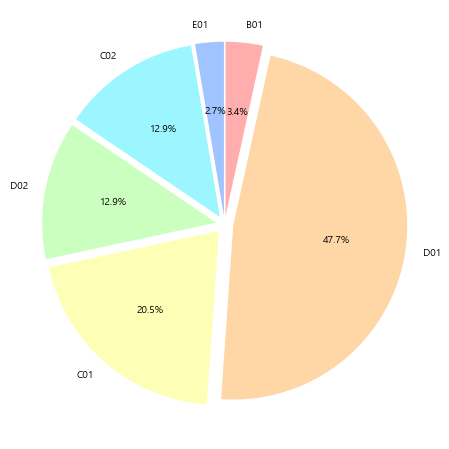

In [88]:
values = [grp.size()['B01'], grp.size()['D01'], grp.size()['C01'], grp.size()['C02'], grp.size()['C02'], grp.size()['E01']]
colors = ['#ffadad', '#ffd6a5', '#fdffb6', '#caffbf', '#9bf6ff', '#a0c4ff']
explode = [0.05] * 6
plt.figure(figsize=(8, 8))
plt.pie(values, labels=labels, autopct='%.1f%%', startangle=90, counterclock=False, colors=colors, explode=explode)
plt.show()

- B01: 숙박업종
- C01~2 : 엔터테이먼트
- D1~2 : F&B = Food and Beverage
- E01 : 렌탈업종